# ***Ames, Iowa - Christopher McGahon - S2102466***

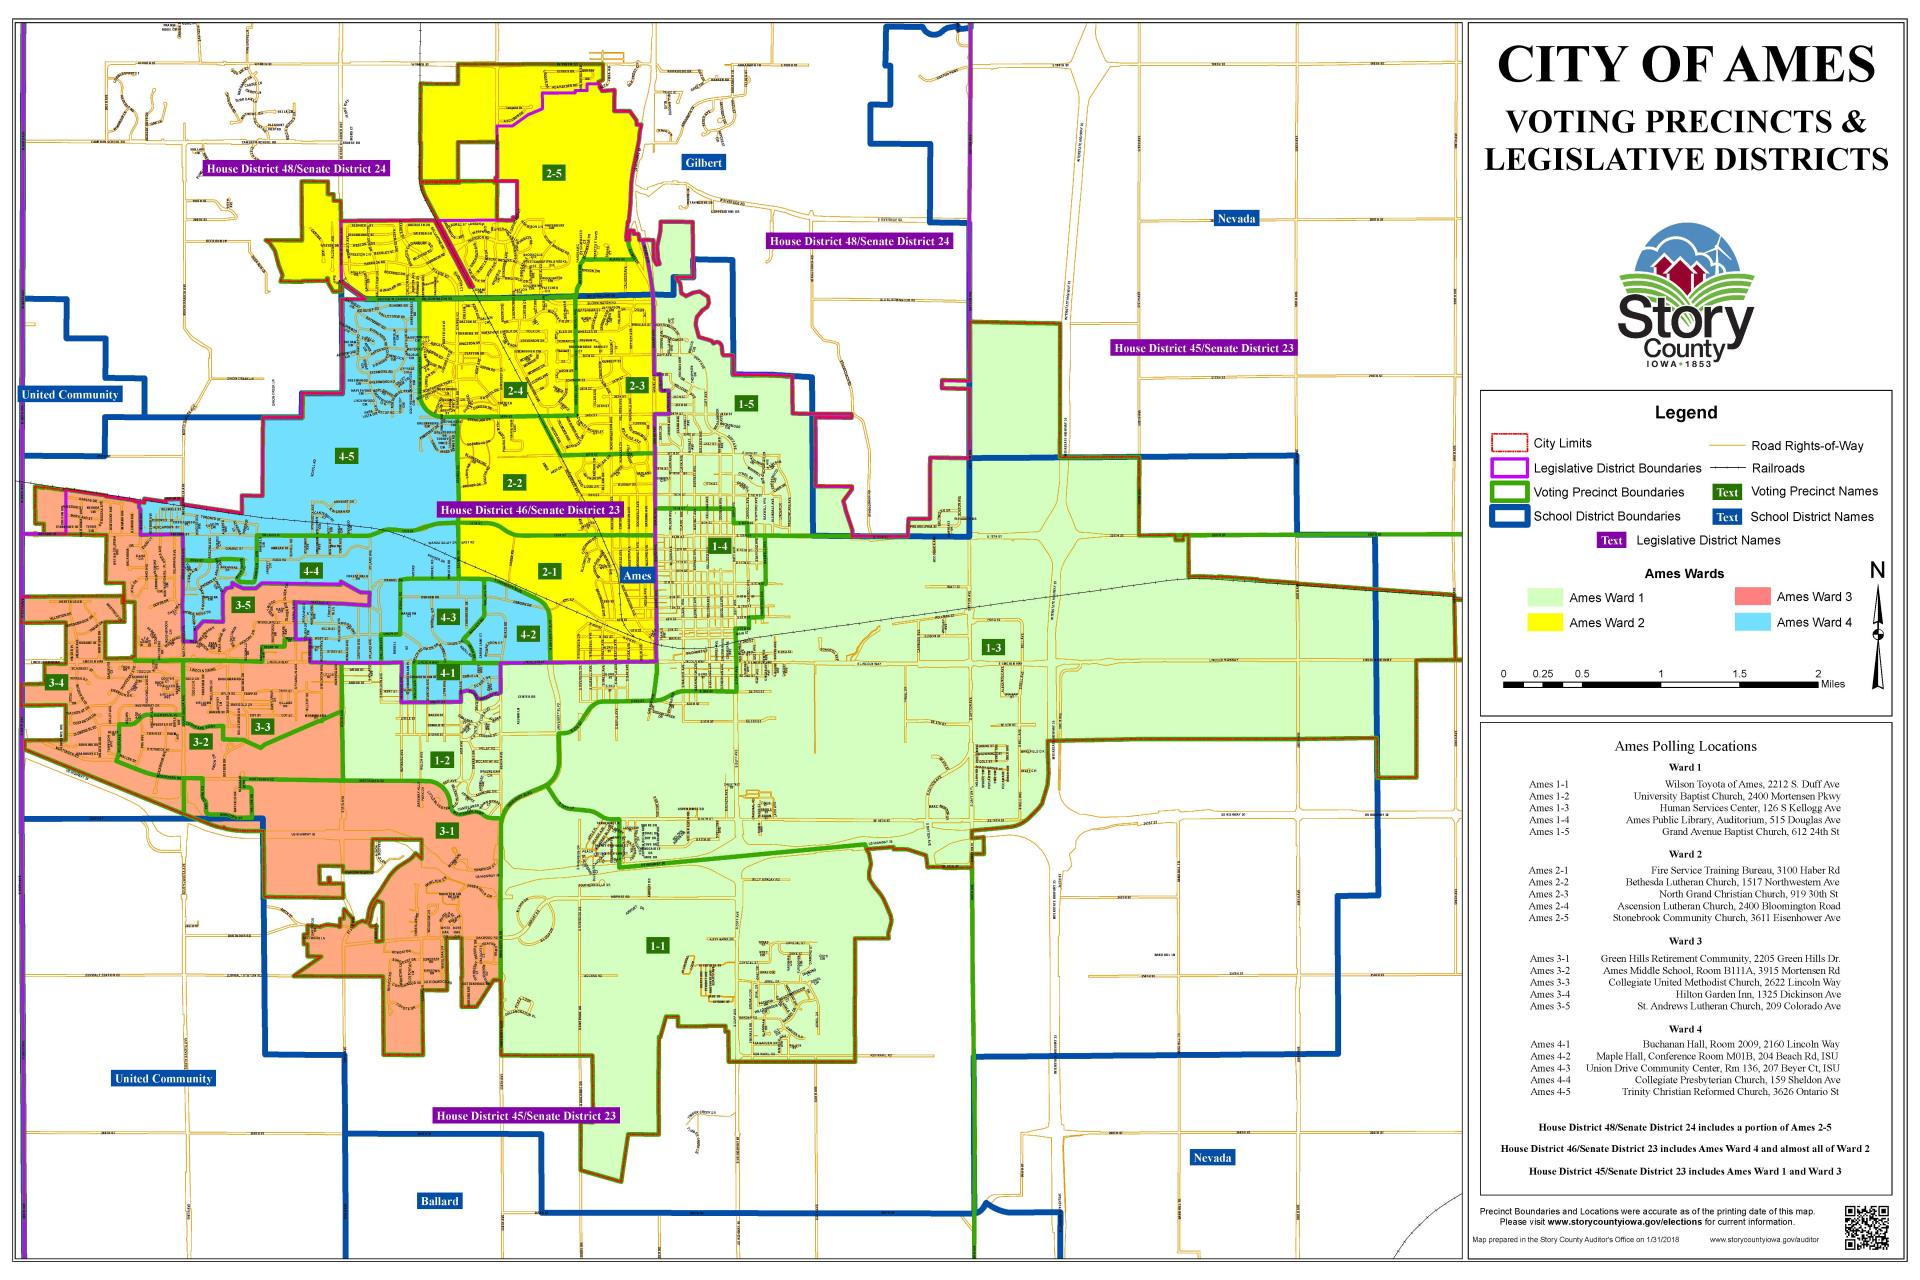

*   Population: 58,965 (2010 Census)
*   Area: 71.69 km²
*   Elevation: 287 m
*   About: 

  Ames is a city in Story County, Iowa, United States, located approximately 30 miles north of Des Moines in central Iowa. It is best known as the home of Iowa State University, with leading agriculture, design, engineering, and veterinary medicine colleges.

# Set Up

In [1]:
#Set up of any libs used throughout the code
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('default')

In [2]:
#Set up mount of the google drive the data is on
from google.colab import drive 
drive.mount('/content/gdrive')
%cd gdrive/
%cd My\ Drive
%cd Data/

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive
/content/gdrive/My Drive
/content/gdrive/My Drive/Data


In [3]:
data = pd.read_csv('sd_cw1_data.csv') #Name of the CSV file the data is being drawn from 

# The formatting of the data

In [4]:
data.head() #Return the first 5 records of the data

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,...,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1960,1960,Hip,CompShg,BrkFace,Plywood,Stone,112.0,TA,TA,CBlock,TA,Gd,Gd,BLQ,639.0,Unf,0.0,441.0,1080.0,...,Y,SBrkr,1656,0,0,1656,1.0,0.0,1,0,3,1,TA,7,Typ,2,Gd,Attchd,1960.0,Fin,2.0,528.0,TA,TA,P,210,62,0,0,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,...,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,...,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,7,5,1968,1968,Hip,CompShg,BrkFace,BrkFace,None,0.0,Gd,TA,CBlock,TA,TA,No,ALQ,1065.0,Unf,0.0,1045.0,2110.0,...,Y,SBrkr,2110,0,0,2110,1.0,0.0,2,1,3,1,Ex,8,Typ,2,TA,Attchd,1968.0,Fin,2.0,522.0,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,...,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


From taking a look at the head of the data an understanding of what is provided can be obtained, there 83 different types of data recorded

In [5]:
data.tail() #Return the last 5 records of the data 

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,...,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
2925,2926,923275080,80,RL,37.0,7937,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Mitchel,Norm,Norm,1Fam,SLvl,6,6,1984,1984,Gable,CompShg,HdBoard,HdBoard,None,0.0,TA,TA,CBlock,TA,TA,Av,GLQ,819.0,Unf,0.0,184.0,1003.0,...,Y,SBrkr,1003,0,0,1003,1.0,0.0,1,0,3,1,TA,6,Typ,0,NaN,Detchd,1984.0,Unf,2.0,588.0,TA,TA,Y,120,0,0,0,0,0,NaN,GdPrv,NaN,0,3,2006,WD,Normal,142500
2926,2927,923276100,20,RL,NaN,8885,Pave,NaN,IR1,Low,AllPub,Inside,Mod,Mitchel,Norm,Norm,1Fam,1Story,5,5,1983,1983,Gable,CompShg,HdBoard,HdBoard,None,0.0,TA,TA,CBlock,Gd,TA,Av,BLQ,301.0,ALQ,324.0,239.0,864.0,...,Y,SBrkr,902,0,0,902,1.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1983.0,Unf,2.0,484.0,TA,TA,Y,164,0,0,0,0,0,NaN,MnPrv,NaN,0,6,2006,WD,Normal,131000
2927,2928,923400125,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,SFoyer,5,5,1992,1992,Gable,CompShg,HdBoard,Wd Shng,None,0.0,TA,TA,PConc,Gd,TA,Av,GLQ,337.0,Unf,0.0,575.0,912.0,...,Y,SBrkr,970,0,0,970,0.0,1.0,1,0,3,1,TA,6,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,80,32,0,0,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,132000
2928,2929,924100070,20,RL,77.0,10010,Pave,NaN,Reg,Lvl,AllPub,Inside,Mod,Mitchel,Norm,Norm,1Fam,1Story,5,5,1974,1975,Gable,CompShg,HdBoard,HdBoard,None,0.0,TA,TA,CBlock,Gd,TA,Av,ALQ,1071.0,LwQ,123.0,195.0,1389.0,...,Y,SBrkr,1389,0,0,1389,1.0,0.0,1,0,2,1,TA,6,Typ,1,TA,Attchd,1975.0,RFn,2.0,418.0,TA,TA,Y,240,38,0,0,0,0,NaN,NaN,NaN,0,4,2006,WD,Normal,170000
2929,2930,924151050,60,RL,74.0,9627,Pave,NaN,Reg,Lvl,AllPub,Inside,Mod,Mitchel,Norm,Norm,1Fam,2Story,7,5,1993,1994,Gable,CompShg,HdBoard,HdBoard,BrkFace,94.0,TA,TA,PConc,Gd,TA,Av,LwQ,758.0,Unf,0.0,238.0,996.0,...,Y,SBrkr,996,1004,0,2000,0.0,0.0,2,1,3,1,TA,9,Typ,1,TA,Attchd,1993.0,Fin,3.0,650.0,TA,TA,Y,190,48,0,0,0,0,NaN,NaN,NaN,0,11,2006,WD,Normal,188000


From the tail of the data we can an understanding of how many different records there are, since the unique ID's for order end at 2929 we gather this as our ammount of records collect for housing data 

In [6]:
print (data.shape) #Return the rows,columns of the data

(2930, 82)


This is then verified by returning the shape of the data which confirms the previous statments (2930 is returned rather than 2929 due to the headers taking one row)

In [7]:
data.columns #Return the column names of the data

Index(['Order', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
      

Here is the index for all our records, a look at what these heading refer to can be found [here](https://colab.research.google.com/drive/1GdG4ag-fuQVRX6DiPVUqtduH1ibQfEd1#scrollTo=g5WNy2PTaQbP&line=12&uniqifier=1) in the notebook) 

In [8]:
data.describe() #Show count, min, max, mean etc.. of all columns

,Order,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Yr Blt,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
count,2930.00000,2.930000e+03,2930.000000,2440.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2907.000000,2929.000000,2929.000000,2929.000000,2929.000000,2930.000000,2930.000000,2930.000000,2930.000000,2928.000000,2928.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2771.000000,2929.000000,2929.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000
mean,1465.50000,7.144645e+08,57.387372,69.224590,10147.921843,6.094881,5.563140,1971.356314,1984.266553,101.896801,442.629566,49.722431,559.262547,1051.614544,1159.557679,335.455973,4.676792,1499.690444,0.431352,0.061134,1.566553,0.379522,2.854266,1.044369,6.443003,0.599317,1978.132443,1.766815,472.819734,93.751877,47.533447,23.011604,2.592491,16.002048,2.243345,50.635154,6.216041,2007.790444,180796.060068
std,845.96247,1.887308e+08,42.638025,23.365335,7880.017759,1.411026,1.111537,30.245361,20.860286,179.112611,455.590839,169.168476,439.494153,440.615067,391.890885,428.395715,46.310510,505.508887,0.524820,0.245254,0.552941,0.502629,0.827731,0.214076,1.572964,0.647921,25.528411,0.760566,215.046549,126.361562,67.483400,64.139059,25.141331,56.087370,35.597181,566.344288,2.714492,1.316613,79886.692357
min,1.00000,5.263011e+08,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1895.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,733.25000,5.284770e+08,20.000000,58.000000,7440.250000,5.000000,5.000000,1954.000000,1965.000000,0.000000,0.000000,0.000000,219.000000,793.000000,876.250000,0.000000,0.000000,1126.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1960.000000,1.000000,320.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129500.000000
50%,1465.50000,5.354536e+08,50.000000,68.000000,9436.500000,6.000000,5.000000,1973.000000,1993.000000,0.000000,370.000000,0.000000,466.000000,990.000000,1084.000000,0.000000,0.000000,1442.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1979.000000,2.000000,480.000000,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,160000.000000
75%,2197.75000,9.071811e+08,70.000000,80.000000,11555.250000,7.000000,6.000000,2001.000000,2004.000000,164.000000,734.000000,0.000000,802.000000,1302.000000,1384.000000,703.750000,0.000000,1742.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,213500.000000
max,2930.00000,1.007100e+09,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1526.000000,2336.000000,6110.000000,5095.000000,2065.000000,1064.000000,5642.000000,3.000000,2.000000,4.000000,2.000000,8.000000,3.000000,15.000000,4.000000,2207.000000,5.000000,1488.000000,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000


In [9]:
#Print the smallest and biggest value for 'Year Sold' 
print(data['Yr Sold'].min()) 
print(data['Yr Sold'].max())

2006
2010


By using the header 'Yr Sold' we can get an idea of the timeframe in which the data was recorded, the running of the above it appears our data spans from 2006 to 2010

In [10]:
data.nunique() #Show how many unique records by column

Order             2930
PID               2930
MS SubClass         16
MS Zoning            7
Lot Frontage       128
                  ... 
Mo Sold             12
Yr Sold              5
Sale Type           10
Sale Condition       6
SalePrice         1032
Length: 82, dtype: int64

In [11]:
data.isnull().sum() #Show count of missing records by column 

Order               0
PID                 0
MS SubClass         0
MS Zoning           0
Lot Frontage      490
                 ... 
Mo Sold             0
Yr Sold             0
Sale Type           0
Sale Condition      0
SalePrice           0
Length: 82, dtype: int64

# Data Cleaning

In [12]:
#Makes a list of all null values in our data & print
null_list = data.isnull().sum().sort_values(ascending=False) 
null_list[null_list > 0]

Pool QC           2917
Misc Feature      2824
Alley             2732
Fence             2358
Fireplace Qu      1422
Lot Frontage       490
Garage Qual        159
Garage Yr Blt      159
Garage Cond        159
Garage Finish      159
Garage Type        157
Bsmt Exposure       83
BsmtFin Type 2      81
BsmtFin Type 1      80
Bsmt Cond           80
Bsmt Qual           80
Mas Vnr Type        23
Mas Vnr Area        23
Bsmt Full Bath       2
Bsmt Half Bath       2
Garage Area          1
Garage Cars          1
Total Bsmt SF        1
Bsmt Unf SF          1
BsmtFin SF 2         1
BsmtFin SF 1         1
Electrical           1
dtype: int64

To clean up our data we must first take a look out for any missing values contained by our data, by creating a list of empty values and pritning it out we can an idea of our data. since items such as 'Pool QC' or 'Garage Type' appear to be missing values we can put this down to the fact that all of these records may simply refer to the fact that the houses have no pool or garage  rather these being an omission of information. To clean up these values rather than drop these headings we can replace all empty values with a string or 0 for any relevant status. 

In [48]:
#Replace null values in data with a custom insert to clean up data

data['Pool QC'] = data['Pool QC'].replace({np.nan: 'No pool'})

data['Misc Feature'] = data['Misc Feature'].replace({np.nan: 'No misc. features'})

data['Alley'] = data['Alley'].replace({np.nan: 'No alley'})

data['Fence'] = data['Fence'].replace({np.nan: 'No fence'})
data['Fireplace Qu'] = data['Fireplace Qu'].replace({np.nan: 'No fireplace'})

data['Garage Finish'] = data['Garage Finish'].replace({np.nan: 'No garage'})
data['Garage Cond'] = data['Garage Cond'].replace({np.nan: 'No garage'})
data['Garage Qual'] = data['Garage Qual'].replace({np.nan: 'No garage'})
data['Garage Yr Blt'] = data['Garage Yr Blt'].replace({np.nan: 'No garage'})
data['Garage Type'] = data['Garage Type'].replace({np.nan: 'No garage'})

data['Bsmt Cond'] = data['Bsmt Cond'].replace({np.nan: 'No basement'})
data['Bsmt Exposure'] = data['Bsmt Exposure'].replace({np.nan: 'No basement'})
data['Bsmt Qual'] = data['Bsmt Qual'].replace({np.nan: 'No basement'})
data['BsmtFin Type 2'] = data['BsmtFin Type 2'].replace({np.nan: 'No basement'})
data['BsmtFin Type 1'] = data['BsmtFin Type 1'].replace({np.nan: 'No basement'})

data['Mas Vnr Type'] = data['Mas Vnr Type'].replace({np.nan: 'No masonry'})
data['Mas Vnr Area'] = data['Mas Vnr Area'].replace({np.nan: 'No masonry'})

data['Lot Frontage'] = data['Lot Frontage'].fillna(0)


In [70]:
#Running the same code to verify changes
null_list = data.isnull().sum().sort_values(ascending=False) 
null_list[null_list > 0]

Bsmt Full Bath    2
Bsmt Half Bath    2
Total Bsmt SF     1
BsmtFin SF 2      1
Bsmt Unf SF       1
BsmtFin SF 1      1
Electrical        1
Garage Cars       1
Garage Area       1
dtype: int64

In [73]:
data.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 84 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2930 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            2930 non-null   object 
 8   Lot Shape        2930 non-null   object 
 9   Land Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot Config       2930 non-null   object 
 12  Land Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition 1      2930 non-null   object 
 15  Condition 2      2930 non-null   object 
 16  Bldg Type        2930 non-null   object 
 17  House Style   

Here we take a look at the data types of each record, this will be useful for later for when we try and work with different fields

# Exploratory Data Analysis & Visualization


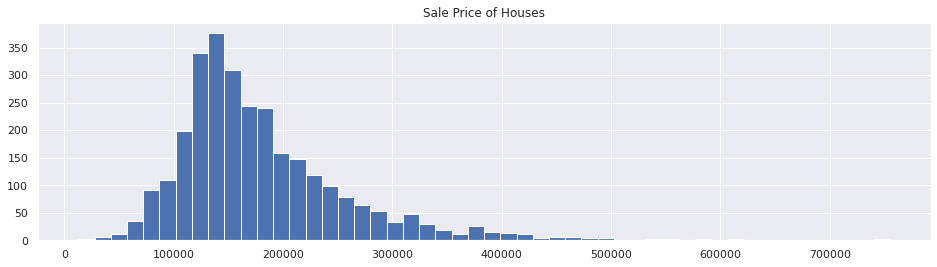

The highest house price is $ 755000
The lowest house price is $ 12789
The average house price is $ 180796


In [75]:
# Visual of all the house pricings
data.SalePrice.hist(bins=50,figsize=(16,4))
plt.title('Sale Price of Houses')
plt.show()
print('The highest house price is $',data['SalePrice'].max())
print('The lowest house price is $',data['SalePrice'].min())
print('The average house price is $',round(data['SalePrice'].mean()))

The sales price is plotted using a histogram and we can get an idea of the different range of prices we have, the distribution is right skewed with outliers in the higher priceranges, the highest being 180,000+, the lowest being Around 12700 and the average pricing being between 100k - 200k, The average house cost in the USA around the 2010's was 220k so Ames is just under the average for the country.

The most recent house recorded was built in the year 2010
The oldest house recorded was built in the year 1872
The average year a house was buit in is the year 1971


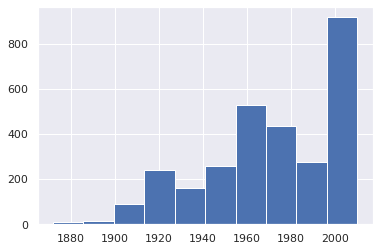

In [76]:
#Hist to show the years houses where built
plt.hist(data['Year Built']) 
print('The most recent house recorded was built in the year',data['Year Built'].max())
print('The oldest house recorded was built in the year',data['Year Built'].min())
print('The average year a house was buit in is the year',round(data['Year Built'].mean()))

Based on the above data we can see that the oldest record of a house was built around the 1880's, with exponentialy developments happing in the 1920's, 1960's and 2000's, the development of the 60's probably owing to the great depression in America. Interesting to note that the city was founded in 1864 so records did not start until 72'.


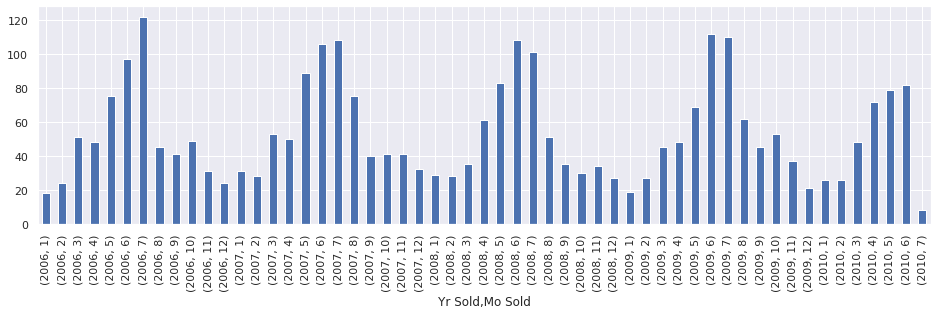

In [77]:
#Graph is plot by grouping month and year together and count the number of sales
data.groupby(['Yr Sold','Mo Sold']).PID.count().plot(kind='bar', figsize=(16,4)) 
plt.show()

Here the year and month is being grouped together and count using the PID value to check for each unique house sold and display in a bar chart. From this we can see from the spikes that most houses are bought in the period from May - July and then drops off drastically

In [78]:
#Split up data into two frames, once they've got numeric values we combine to find out useful data
numerical_cols = data.dtypes[data.dtypes != 'object'].index
numerical_data = data[numerical_cols]
numerical_data = numerical_data.fillna(data.mode().iloc[0]) #fill empty values
numerical_data.isnull().sum().sort_values(ascending = False)
data_corr = numerical_data.corr()['SalePrice'].abs().sort_values(ascending = False)
print (data_corr.round(3)) #Print all correlation values

SalePrice          1.000
Overall Qual       0.799
Gr Liv Area        0.707
Garage Cars        0.648
Garage Area        0.640
Total Bsmt SF      0.633
1st Flr SF         0.622
Year Built         0.558
Full Bath          0.546
Year Remod/Add     0.533
Mas Vnr Area       0.502
TotRms AbvGrd      0.495
Fireplaces         0.475
BsmtFin SF 1       0.433
Wood Deck SF       0.327
Open Porch SF      0.313
Half Bath          0.285
Bsmt Full Bath     0.276
2nd Flr SF         0.269
Lot Area           0.267
Garage Yr Blt      0.253
PID                0.247
Lot Frontage       0.202
Bsmt Unf SF        0.183
Bedroom AbvGr      0.144
Enclosed Porch     0.129
Kitchen AbvGr      0.120
Screen Porch       0.112
Overall Cond       0.102
MS SubClass        0.085
Pool Area          0.068
Low Qual Fin SF    0.038
Bsmt Half Bath     0.036
Mo Sold            0.035
3Ssn Porch         0.032
Order              0.031
Yr Sold            0.031
Misc Val           0.016
BsmtFin SF 2       0.006
Name: SalePrice, dtype: f

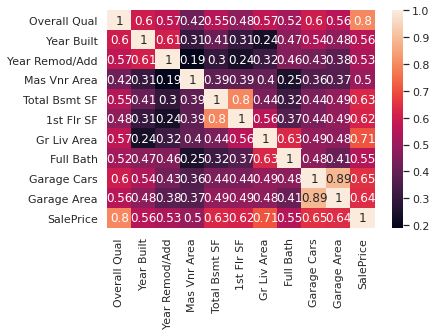

In [59]:
#Drop values with less than 0.5 correlation and display them in a heatmap for easy reading
data_corr = (data_corr[data_corr < 0.5 ]).keys()
data_corr = data.drop(data_corr, axis=1)
corr_matrix = data_corr.corr().round(2)
sns.heatmap(data= corr_matrix, annot=True)

Since there are too many values to view on a heatmap, int and float values are parsed into two different frames and combined into one list with only numeric values, any headers with less than .5 correlation are dropped too to show only relevant information. As we can see the Overall Quality of the house and the total living area contained have a huge effect on the sale price of the house. 

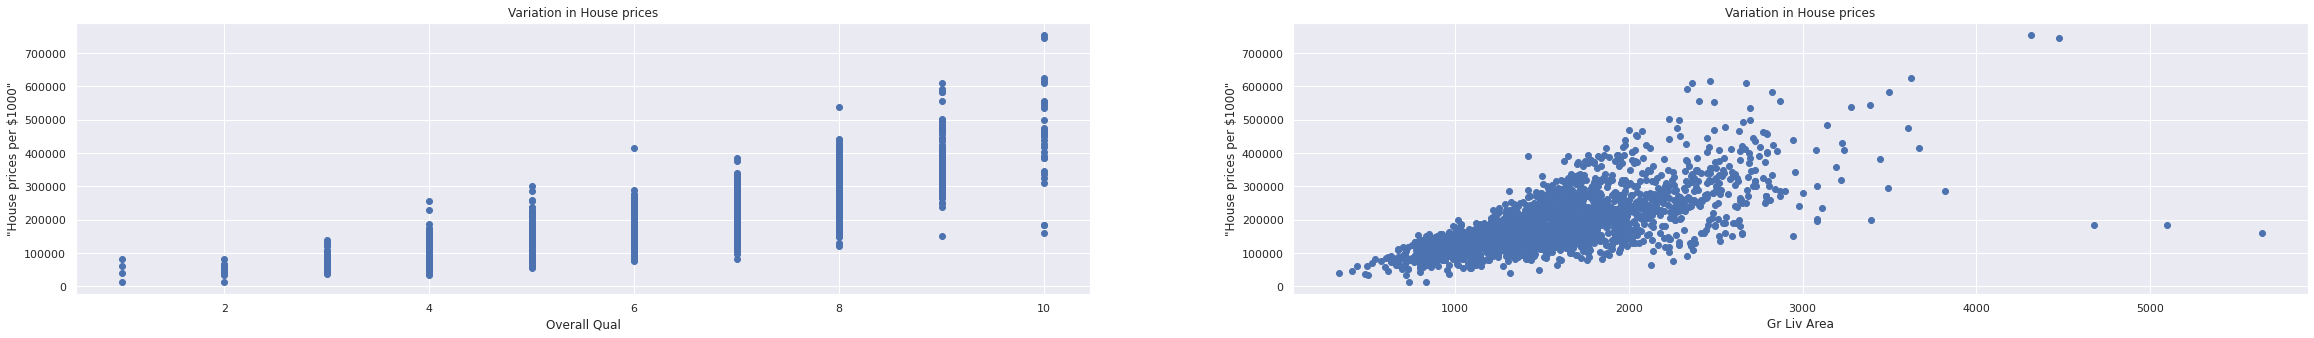

In [86]:
#Comparison of housing prices with regards to quality & Living Area
plt.figure(figsize=(40, 5))
features = ['Overall Qual', 'Gr Liv Area']
compare = data['SalePrice']
for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = data[col]
    y = compare
    plt.scatter(x, y, marker='o')
    plt.title("Variation in House prices")
    plt.xlabel(col)
    plt.ylabel('"House prices per $1000"')

The previous statement is then prove by displaying the mentioned values on graphs where we see a steady increase of price regarding quality and area of the housing, There is a steady increase of price in regards to the total area offered by homes, however there are several strange point's to be aware of such as the 3 relatively cheap point that seem to have the most area of all the values which may be interesting to see why that is.

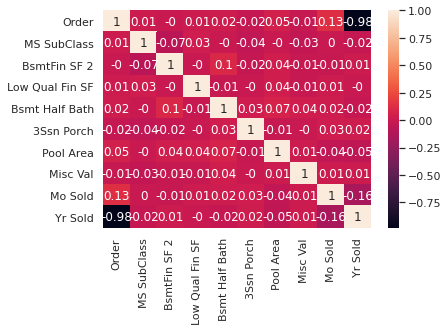

In [60]:
# Same code as used above, this time with the lowest correlation values
data_corr = numerical_data.corr()['SalePrice'].abs().sort_values(ascending = False)
data_corr = (data_corr[data_corr > 0.1]).keys()
data_corr = data.drop(data_corr, axis=1)
corr_matrix = data_corr.corr().round(2)
sns.heatmap(data= corr_matrix, annot=True)

Here we run the same code but this time we filter out the high values and only display those with a low correlation

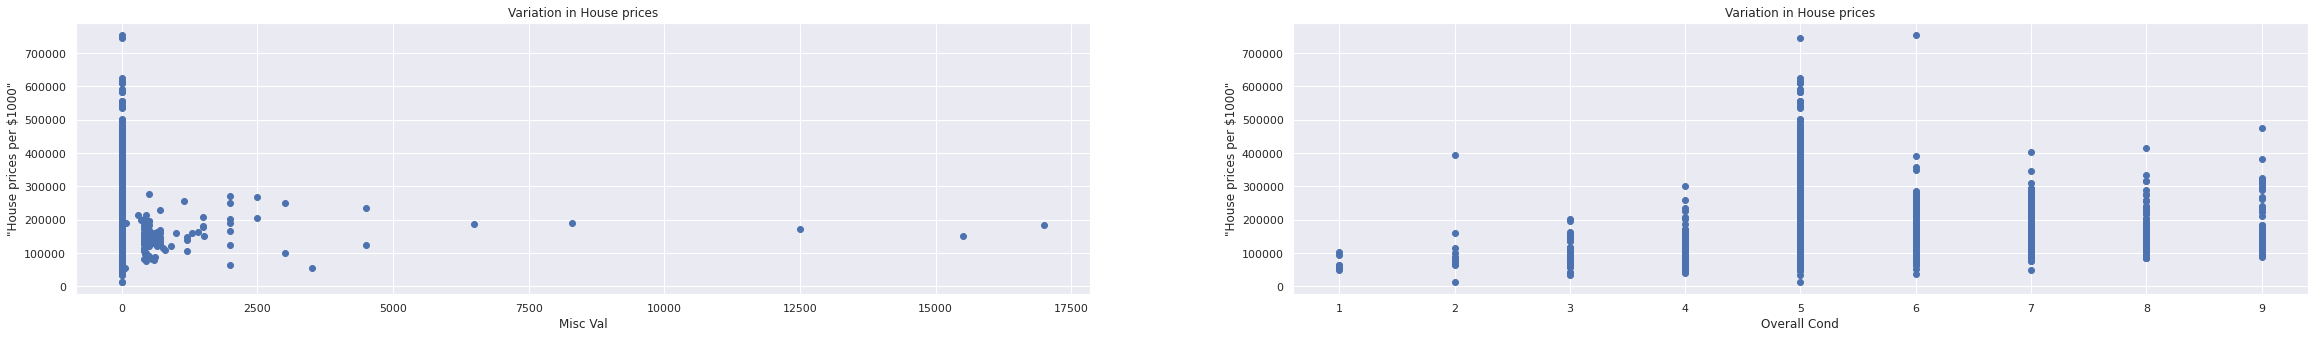

In [87]:
#Comparison of housing prices with regards to quality & Living Area
plt.figure(figsize=(40, 5))
features = ['Misc Val', 'Overall Cond']
compare = data['SalePrice']
for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = data[col]
    y = compare
    plt.scatter(x, y, marker='o')
    plt.title("Variation in House prices")
    plt.xlabel(col)
    plt.ylabel('"House prices per $1000"')

Interesing to see is the weak correlation between the condition of the property and showing that misc features do not add much to a houses sale price and should possible be ignore if trying to do up a house in order to sell it on for profit. Since there is no value with a strong negative correlation we cannot test and visualize it.

In [61]:
def get_feature_groups(): 
    num_features = data.select_dtypes(include=['int64','float64']).columns
    num_features = num_features.drop(['PID','SalePrice']) # drop ID and SalePrice
    cat_features = data.select_dtypes(include=['object']).columns
    return list(num_features), list(cat_features)


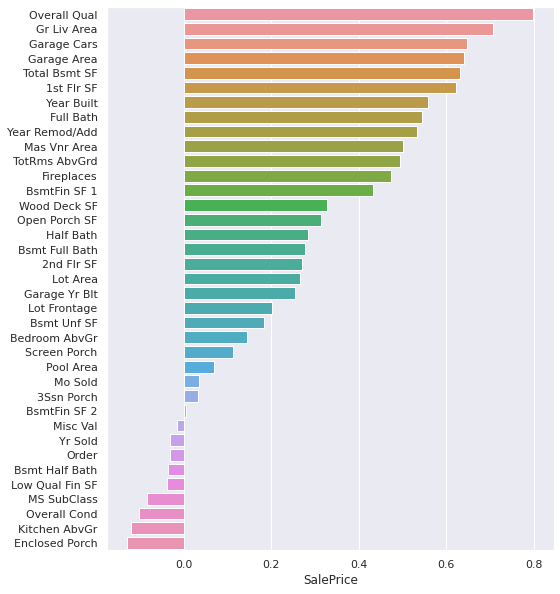

In [62]:
num_features, cat_features = get_feature_groups()
corr = data[['SalePrice'] + num_features].corr()
corr = corr.sort_values('SalePrice', ascending=False)
plt.figure(figsize=(8,10))
sns.barplot( x= corr.SalePrice[1:], y= corr.index[1:], orient='h')
plt.show()

Alternitively, all correlation data can be viewed by using the above chart, however as it is less informative it is useful to use in conjunction with our previous correlation visuals to get an idea of the data

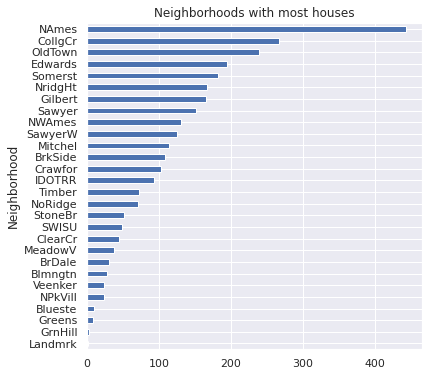

In [64]:
#Count of each record by the neighbourhood it is in
data.groupby('Neighborhood').PID.count().sort_values().plot(kind='barh', figsize=(6,6))
plt.title('Neighborhoods with most houses')
plt.show()

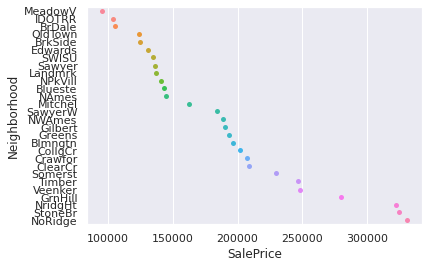

In [89]:
#Create new frame data by getting the mean of all values in a neighbourhood and display 
data_neigh = pd.concat([data.groupby('Neighborhood').mean()['SalePrice'] ,data.groupby('Neighborhood').count()['PID']],axis=1)
sns.stripplot(x = data_neigh.sort_values(by='SalePrice').SalePrice, y = data_neigh.sort_values(by='SalePrice').index);

Interestingly the data shown above could be used group the neighbourhoods into 3 or 4 groups for further analysis based on the distinct jump in sale prices e.g MeadowV : BrDale vs OldTown : NAmes

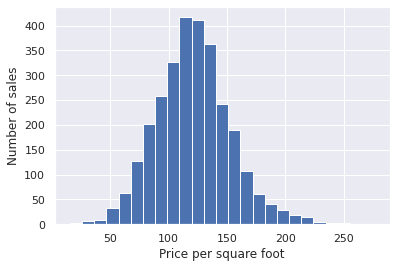

In [90]:
#By using the sale price and dividing by the area we can get an approximation of the cost per square foot of housing
price_per_foot = data['SalePrice']/data['Gr Liv Area']  
plt.hist(price_per_foot, bins=25)
plt.ylabel('Number of sales')
plt.xlabel('Price per square foot')
plt.show()

By getting the value it cost per square foot of living space this information can be used to predict housing prices in the future or determine if a buy is over or underpaying for what they are purchasing

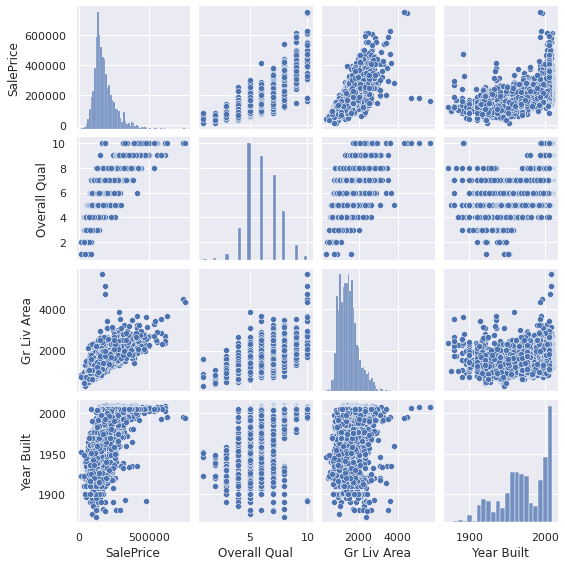

In [51]:
sns.set()
cols = ['SalePrice', 'Overall Qual', 'Gr Liv Area', 'Year Built']
sns.pairplot(data[cols], height = 2)
plt.show();

# Data Header Legend

Order : Observation number

PID : Parcel identification number

MS SubClass : Identifies the type of dwelling involved in the sale.

MS Zoning : Identifies the general zoning classification of the sale.

Lot Frontage : Linear feet of street connected to property

Lot Area : Lot size in square feet

Street : Type of road access to property

Alley : Type of alley access to property

Lot Shape : General shape of property

Land Contour : Flatness of the property

Utilities : Type of utilities available

Lot Config : Lot configuration

Land Slope : Slope of property

Neighborhood : Physical location in Ames itself

Condition 1 : Proximity to various conditions

Condition 2 : Proximity to various conditions

Bldg Type : Type of house

House Style : Style of house

Overall Qual : Rates the overall material and finish of the house

Overall Cond : Rates the overall condition of the house.

Year Built : Original construction date

Year Remod/Add : Remodel date (same as construction date if no remodeling or additions)

Roof Style : Type of roof

Roof Matl : Roof material

Exterior 1 : Exterior covering on house

Exterior 2 : Exterior covering on house (if more than one material)

Mas Vnr Type : Masonry veneer type

Mas Vnr Area : Masonry veneer area in square feet

Exter Qual : Evaluates the quality of the material on the exterior

Exter Cond : Evaluates the present condition of the material on the exterior

Foundation : Type of foundation

Bsmt Qual : Evaluates the height of the basement

Bsmt Cond : Evaluates the general condition of the basement

Bsmt Exposure : Refers to walkout or garden level walls

BsmtFin Type 1 : Rating of basement finished area

BsmtFin SF 1 : Type 1 finished square feet

BsmtFinType 2 : Rating of basement finished area (if multiple types)

BsmtFin SF 2 : Type 2 finished square feet

Bsmt Unf SF : Unfinished square feet of basement area

Total Bsmt SF : Total square feet of basement area

Heating : Type of heating

HeatingQC : Heating quality and condition

Central Air : Central air conditioning

Electrical : Electrical system

1st Flr SF : First Floor square feet

2nd Flr SF  : Second floor square feet

Low Qual Fin SF : Low quality finished square feet

Gr Liv Area : Above ground living area square feet

Bsmt Full Bath : Basement full bathrooms

Bsmt Half Bath : Basement half bathrooms

Full Bath : Full bathrooms above grade

Half Bath : Half baths above grade

Bedroom : Bedrooms above grade

Kitchen : Kitchens above grade

KitchenQual : Kitchen quality

TotRmsAbvGrd : Total rooms above grade 

Functional : Home functionality 

Fireplaces : Number of fireplaces

FireplaceQu : Fireplace quality

Garage Type : Garage location

Garage Yr Blt : Year garage was built

Garage Finish  : Interior finish of the garage

Garage Cars : Size of garage in car capacity

Garage Area : Size of garage in square feet

Garage Qual : Garage quality

Garage Cond : Garage condition

Paved Drive : Paved driveway

Wood Deck SF : Wood deck area in square feet

Open Porch SF : Open porch area in square feet

Enclosed Porch : Enclosed porch area in square feet

3-Ssn Porch : Three season porch area in square feet

Screen Porch : Screen porch area in square feet

Pool Area : Pool area in square feet

Pool QC : Pool quality

Fence : Fence quality

Misc Feature : Miscellaneous feature not covered in other categories

Misc Val : Value of any misc features

Mo Sold : Month Sold in the format (MM)

Yr Sold : Year Sold in the format (YYYY)

Sale Type : Type of sale

Sale Condition : Condition of sale

SalePrice : Sale price of the property

# References



*   Ames City Website [link ](https://www.cityofames.org/about-ames/interesting-facts-about-ames)
*   Python Data Science Handbook by Jake VanderPlas
*   Linear Regression on Boston Housing Dataset By amitg0161
*   Statista housing data [link ](www.statista.com)


